In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [8]:
# Read the file in from device
date_cols = ['Date']
df = pd.read_csv('BTC_INR_2years_10Nov2020.csv', parse_dates=date_cols, index_col=['Date'])

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-10,462866.68750,466574.06250,462807.28125,464540.25000,464540.25000,268561593600
2018-11-11,464859.90625,465557.15625,461301.75000,465104.40625,465104.40625,285758394730
2018-11-12,465139.96875,467847.50000,463837.28125,464650.34375,464650.34375,313286210330
2018-11-13,464790.37500,462823.71875,458803.37500,461472.18750,461472.18750,326815269988
2018-11-14,460873.53125,460636.00000,399751.75000,415338.90625,415338.90625,535531577730


In [10]:
# Check of null values in the data
filt = df['Close'].isnull()

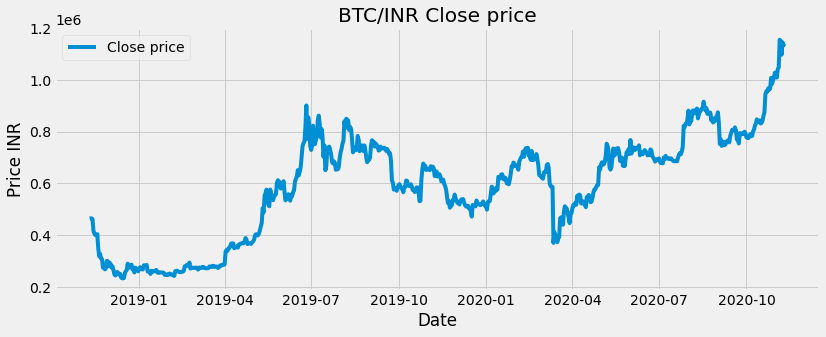

In [12]:
# Visualise
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close price')
plt.legend(loc='upper left')
plt.title('BTC/INR Close price')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()


# MFI

In [22]:
# MFI
typical_price = (df['Close'] + df['High'] + df['Low'])/3
period = 14
money_flow = typical_price * df['Volume']

In [14]:
positive_flow = []
negative_flow = []

for i in range(1, len(typical_price)): # Loop starting from the 2nd typical_price to the end
    if typical_price[i] > typical_price[i-1]: # Check if current typical price is greater than yesterday's typical price
        positive_flow.append(money_flow[i-1]) # Append the money flow of previous typical price to positive flow
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]: # Check if current typical price is less than yesterday's typical price
        negative_flow.append(money_flow[i-1]) # Append the money flow of previous typical price to negative flow
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

In [15]:
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append(sum(positive_flow[i + 1-period : i+1])) # Sum of the pos_flows for 13 days rolling 
for i in range(period-1, len(negative_flow)):
    negative_mf.append(sum(negative_flow[i + 1-period : i+1]))

In [16]:
mfi = 100 * np.array(positive_mf)/(np.array(positive_mf) + np.array(negative_mf))

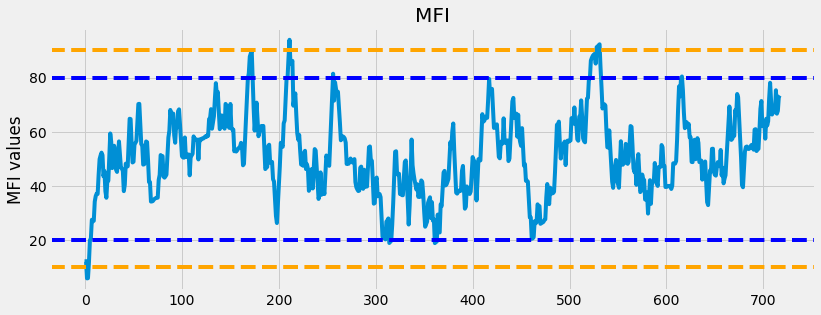

In [17]:
df2 = pd.DataFrame()
df2['MFI'] = mfi
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label = "MFI")
plt.axhline(10, linestyle= '--', color='orange')
plt.axhline(20, linestyle= '--', color='blue')
plt.axhline(80, linestyle= '--', color='blue')
plt.axhline(90, linestyle= '--', color='orange')
plt.title("MFI")
plt.ylabel('MFI values')
plt.show()

In [18]:
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
new_df.head()

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2018-11-24,307278.96875,311901.1875,267847.218750,273888.53125,273888.53125,330260392000,12.136876
2018-11-25,273889.93750,291126.0625,253119.578125,283291.34375,283291.34375,482209275844,12.316701
2018-11-26,283651.65625,290233.8750,257809.859375,267640.50000,267640.50000,458698371615,5.939452
2018-11-27,266705.71875,273738.8125,259001.500000,270873.75000,270873.75000,425285253120,6.000323
2018-11-28,270997.84375,308767.3750,270997.843750,300620.68750,300620.68750,514067836519,11.743327


In [19]:
# function to get the buy and sell signals
def get_signal(data, high, low):
    ''' The 'high' and 'low' parameters tell us if the asset is 
        over-bought or over-sold'''

    buy_signal = []
    sell_signal = []

    for i in range(len(data['MFI'])): # Loop through the dataset
        if data['MFI'][i] >= high: # If the MFI value is higher than the 'high' -> sell signal
            sell_signal.append(data['Close'][i]) # append the 'close' position to sell signal list
            buy_signal.append(np.nan)
        elif data['MFI'][i] <= low: # If the MFI value is lower than the 'low' -> buy signal
            buy_signal.append(data['Close'][i]) # append the 'close' position to sell signal list
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)

    return (buy_signal, sell_signal)

In [20]:
# Add 2 new columns to the new dataframe with the buy and sell signals
new_df['Buy'] = get_signal(new_df, 80, 20)[0] # Takes the 1st value from the tuple of the func and assigns it to the 'Buy' column
new_df['Sell'] = get_signal(new_df, 80, 20)[1] # Takes the 2nd value from the tuple of the func and assigns it to the 'Sell' column

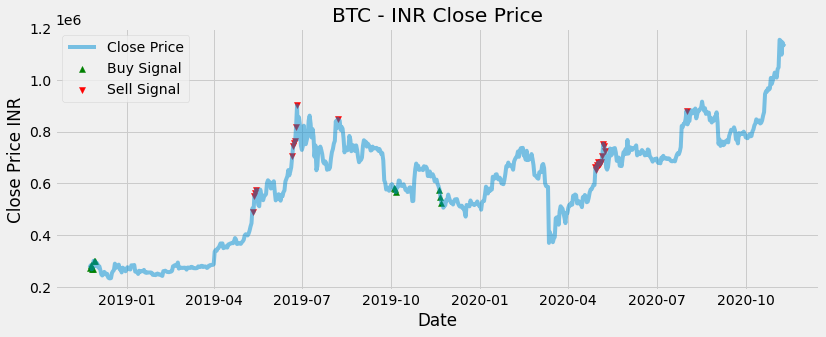

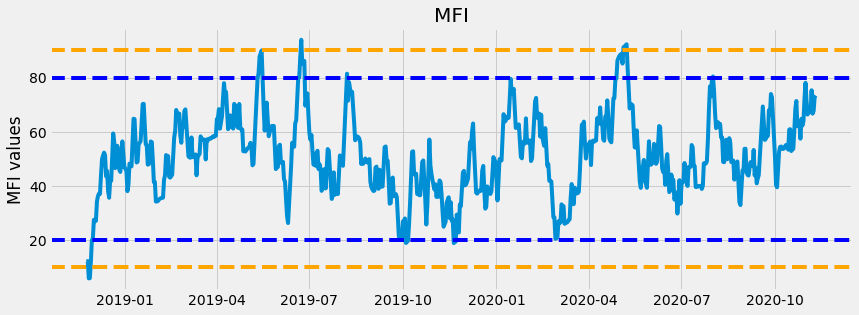

In [21]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label = "Close Price", alpha=0.5)
plt.scatter(new_df.index, new_df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.title("BTC - INR Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12.8, 4.5))
plt.plot(new_df['MFI'], label = "MFI")
plt.axhline(10, linestyle= '--', color='orange')
plt.axhline(20, linestyle= '--', color='blue')
plt.axhline(80, linestyle= '--', color='blue')
plt.axhline(90, linestyle= '--', color='orange')
plt.title("MFI")
plt.ylabel('MFI values')
plt.show()